# Visualization of 60 most common words

In [11]:
from datetime import datetime
import pandas as pd
inputData = pd.read_csv('editeddata.csv')
inputData
print(len(inputData))

44898


In [3]:
from nltk.classify import NaiveBayesClassifier
import nltk.classify.util as cu
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vec = CountVectorizer(analyzer = 'word', ngram_range=(2,2),stop_words='english')

x=inputData['text'].values
x
word_count = {}
for i in range(len(x)):
    X = vec.fit_transform([x[i]]).toarray()
    features = vec.get_feature_names()
    for j in range(len(features)):
        if features[j] in word_count.keys():
            word_count[features[j]] = word_count[features[j]] + X[0][j]
        else:
            word_count[features[j]] = X[0][j]
most = sorted(word_count.items(), key = lambda item:item[1], reverse = True)
most = most[:60]

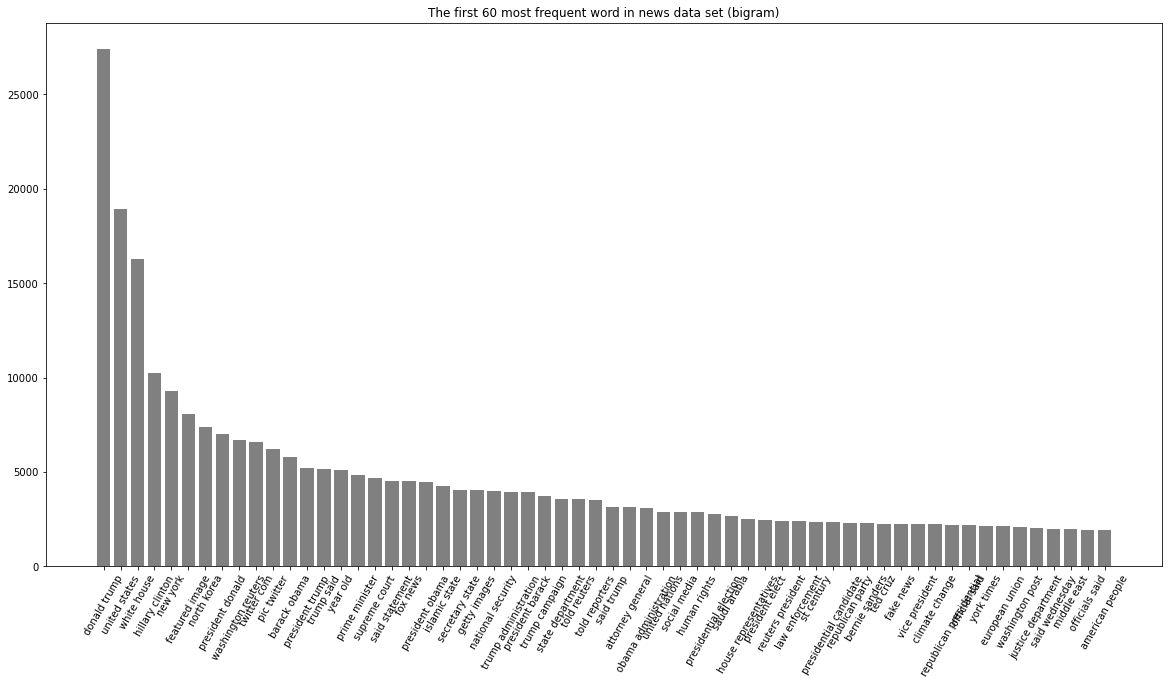

In [46]:
import matplotlib.pyplot as plt
count = [wordcount[1] for wordcount in most]
word = [wordcount[0] for wordcount in most]

plt.figure(figsize=(20,10))
plt.title('The first 60 most frequent word in news data set (bigram)')
plt.bar(range(len(count)), count,color='grey',tick_label=word)
plt.xticks(rotation=60)
plt.show()